In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [10]:
url='https://www.worldometers.info/gdp/gdp-by-country/'
tables=pd.read_html(url)

In [11]:
#check type of dataset we downloaded
type(tables)

list

In [13]:
#specify we want the first dataset
tables[0].head()

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,338289857,"$75,269",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,1425887337,"$12,598",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,123951692,"$34,135",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,83369843,"$48,845",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,1417173173,"$2,389",3.37%


In [30]:
#load the dataset into dataframe df
df=tables[0]

In [31]:
df.head()

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%)
0,1,United States,25462700000000,$25.463 trillion,2.06%,338289857,75269,25.32%
1,2,China,17963200000000,$17.963 trillion,2.99%,1425887337,12598,17.86%
2,3,Japan,4231140000000,$4.231 trillion,1.03%,123951692,34135,4.21%
3,4,Germany,4072190000000,$4.072 trillion,1.79%,83369843,48845,4.05%
4,5,India,3385090000000,$3.385 trillion,7.00%,1417173173,2389,3.37%


In [28]:
#let's check the datatypes
df.dtypes

#                          int64
Country                   object
GDP  (nominal, 2022)       int64
GDP  (abbrev.)            object
GDP growth (%)            object
Population  (2022)         int64
GDP per capita             int64
Share of World GDP (%)    object
dtype: object

In [25]:
df.head()

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%)
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,338289857,"$75,269",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,1425887337,"$12,598",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,123951692,"$34,135",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,83369843,"$48,845",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,1417173173,"$2,389",3.37%


In [ ]:
#lets convert relevant strings to ints
columns_to_clean = ['GDP  (nominal, 2022)', 'GDP per capita']
for col in columns_to_clean:
    df[col] = df[col].str.replace('[\$,]', '', regex=True)
# Convert columns to numeric
df['GDP  (nominal, 2022)'] = pd.to_numeric(df['GDP  (nominal, 2022)'])
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'])
df['Share of World GDP (%)']=df['Share of World GDP (%)'].str.replace('%','')


In [ ]:
#rename relevant fields and add '%'
df.rename(columns={'Share of  World GDP':'Share of World GDP (%)'},inplace=True)
df.rename(columns={'GDP growth':'GDP growth (%)'},inplace=True)

In [36]:
df['GDP growth (%)']=df['GDP growth (%)'].str.replace('%','')
df['GDP growth (%)'] = pd.to_numeric(df['GDP growth (%)'])


In [39]:
df['Share of World GDP (%)'] = pd.to_numeric(df['Share of World GDP (%)'])

In [42]:
df.drop('#',axis=1,inplace=True)

In [44]:
df.dtypes

Country                    object
GDP  (nominal, 2022)        int64
GDP  (abbrev.)             object
GDP growth (%)            float64
Population  (2022)          int64
GDP per capita              int64
Share of World GDP (%)    float64
dtype: object

In [79]:
#find all measures of central tendencies
df.describe()

,"GDP (nominal, 2022)",GDP growth (%),Population (2022),GDP per capita
count,1.770000e+02,177.000000,1.770000e+02,177.000000
mean,5.588979e+11,4.103842,4.368887e+07,16825.977401
std,2.404638e+12,6.664141,1.560540e+08,23072.367011
min,6.034939e+07,-29.100000,1.131200e+04,238.000000
25%,1.356313e+10,2.390000,2.388992e+06,2322.000000
50%,4.575234e+10,3.930000,9.038309e+06,6728.000000
75%,3.010250e+11,5.810000,3.347587e+07,20795.000000
max,2.546270e+13,57.800000,1.425887e+09,127046.000000


In [45]:
#introduce a column to separate countries with +ve and -ve growth
df['Growth Status'] = 'Positive'
df.loc[df['GDP growth (%)'] < 0.00, 'Growth Status'] = 'Negative'

In [46]:
#create dataframes to contain each type
Negative_growth=df[df['Growth Status']=='Negative']
Positive_growth=df[df['Growth Status']=='Positive']

In [47]:
print("Number of countries with negative growth: ",len(Negative_growth))
print("Number of countries with positive growth: ",len(Positive_growth))

Number of countries with negative growth:  16
Number of countries with positive growth:  161


In [82]:
Negative_growth

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status
7,Russia,2240420000000,$2.240 trillion,-2.07,144713314,15482,2.23,Negative
41,Hong Kong,359839000000,$360 billion,-3.48,7488865,48050,0.36,Negative
57,Ukraine,160503000000,$161 billion,-29.10,39701739,4043,0.16,Negative
73,Sri Lanka,74403578363,$74.40 billion,-7.82,21832143,3408,0.07,Negative
75,Belarus,72793457588,$72.79 billion,-4.70,9534954,7634,0.07,Negative
85,Sudan,51662241775,$51.66 billion,-0.95,46874204,1102,0.05,Negative
88,Libya,45752336036,$45.75 billion,-1.24,6812341,6716,0.05,Negative
96,Estonia,38100812959,$38.10 billion,-1.29,1326062,28732,0.04,Negative
108,Macao,21979475561,$21.98 billion,-26.76,695168,31618,0.02,Negative
113,Haiti,20253551885,$20.25 billion,-1.68,11584996,1748,0.02,Negative


Definitely, Russia have had -ve growths due to their conflict while Sri-Lanka underwent an economic crises and Sudan is in a civil war.

In [85]:
#find the highest GDP per capita
Highest_gdp_per_capita=df.sort_values(by='GDP per capita',ascending=False)
Highest_gdp_per_capita.head(10)

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status
68,Luxembourg,82274812251,$82.27 billion,1.55,647599,127046,0.08,Positive
23,Norway,579267000000,$579 billion,3.28,5434319,106594,0.58,Positive
25,Ireland,529245000000,$529 billion,11.97,5023109,105362,0.53,Positive
19,Switzerland,807706000000,$808 billion,2.06,8740472,92410,0.80,Positive
51,Qatar,237296000000,$237 billion,4.83,2695122,88046,0.24,Positive
32,Singapore,466789000000,$467 billion,3.65,5975689,78115,0.46,Positive
0,United States,25462700000000,$25.463 trillion,2.06,338289857,75269,25.32,Positive
104,Iceland,27841648044,$27.84 billion,6.44,372899,74663,0.03,Positive
38,Denmark,395404000000,$395 billion,3.82,5882261,67220,0.39,Positive
11,Australia,1675420000000,$1.675 trillion,3.62,26177413,64003,1.67,Positive


We will discuss factors that lead to high GDP per capita in insights.

In [86]:
Lowest_gdp_per_capita=df.sort_values(by='GDP per capita',ascending=True)
Lowest_gdp_per_capita.head(10)

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status
154,Burundi,3073414678,$3.07 billion,1.85,12889576,238,0.00,Positive
157,Central African Republic,2382618615,$2.38 billion,0.00,5579144,427,0.00,Positive
150,Sierra Leone,3970343852,$3.97 billion,3.50,8605718,461,0.00,Positive
128,Madagascar,14954967604,$14.95 billion,3.80,29611714,505,0.01,Positive
131,Niger,13969605583,$13.97 billion,11.50,26207977,533,0.01,Positive
119,Mozambique,17851491428,$17.85 billion,4.15,32969518,541,0.02,Positive
84,DR Congo,58065953573,$58.07 billion,8.92,99010212,586,0.06,Positive
134,Malawi,13164667627,$13.16 billion,0.92,20405317,645,0.01,Positive
137,Chad,12704149842,$12.70 billion,2.24,17723315,717,0.01,Positive
149,Liberia,4001047150,$4.00 billion,4.81,5302681,755,0.00,Positive


All of the top 10 nations with lowest GDP Per Capita are from Africa.

In [27]:
#deduct correlations
df['Population  (2022)'].corr(df["GDP per capita"])

-0.049217032885420814

In [28]:
df['Population  (2022)'].corr(df['GDP  (nominal, 2022)'])

0.583775268320288

In [29]:
df['GDP growth (%)'].corr(df['Population  (2022)'])

0.005903569059973611

Of all correlations, only Population and GDP have a significant positive relationship meaning as one goes up so does the other.
Let's visualize this.

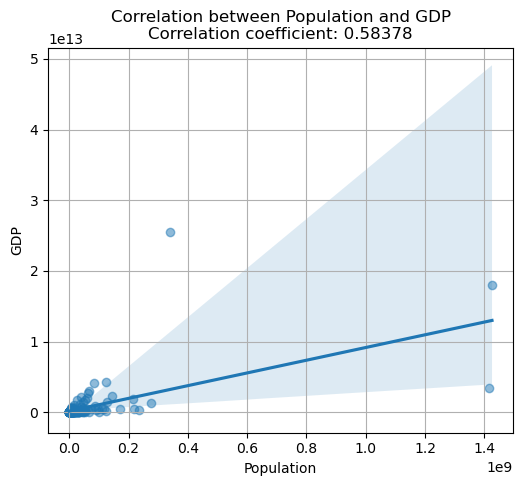

In [32]:
correlation=df['Population  (2022)'].corr(df['GDP  (nominal, 2022)'])
plt.figure(figsize=(6, 5))
sns.regplot(x='Population  (2022)', y='GDP  (nominal, 2022)', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Correlation between Population and GDP\nCorrelation coefficient: {correlation:.5f}')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

In [57]:
#Look at the covariance of the two variables
column1 = df['GDP  (nominal, 2022)']
column2 = df['Population  (2022)']
# Calculate the covariance between the two variables
covariance = column1.cov(column2)
print("Covariance between GDP and Population:", covariance)

Covariance between GDP and Population: 2.1906369791857574e+20


Covariance results prove to us that there is a strong positive relationship between the two variables, as one increases so does the other.

In [38]:
significant_GDP_share=df[df['Share of World GDP (%)']>1.0]
significant_GDP_share

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status
0,United States,25462700000000,$25.463 trillion,2.06,338289857,75269,25.32,Positive
1,China,17963200000000,$17.963 trillion,2.99,1425887337,12598,17.86,Positive
2,Japan,4231140000000,$4.231 trillion,1.03,123951692,34135,4.21,Positive
3,Germany,4072190000000,$4.072 trillion,1.79,83369843,48845,4.05,Positive
4,India,3385090000000,$3.385 trillion,7.00,1417173173,2389,3.37,Positive
5,United Kingdom,3070670000000,$3.071 trillion,4.10,67508936,45485,3.05,Positive
6,France,2782910000000,$2.783 trillion,2.56,64626628,43061,2.77,Positive
7,Russia,2240420000000,$2.240 trillion,-2.07,144713314,15482,2.23,Negative
8,Canada,2139840000000,$2.140 trillion,3.40,38454327,55646,2.13,Positive
9,Italy,2010430000000,$2.010 trillion,3.67,59037474,34053,2.00,Positive


In [48]:
#perform linear regression analysis to predict GDP from Population
#define the predictors
X = df[['Population  (2022)']]
#add a constant variable to the model
X=sm.add_constant(X)
#define the indepedent target variable
y=df['GDP  (nominal, 2022)']
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     GDP  (nominal, 2022)   R-squared:                       0.341
Model:                              OLS   Adj. R-squared:                  0.337
Method:                   Least Squares   F-statistic:                     90.47
Date:                  Mon, 11 Sep 2023   Prob (F-statistic):           1.49e-17
Time:                          10:48:51   Log-Likelihood:                -5259.8
No. Observations:                   177   AIC:                         1.052e+04
Df Residuals:                       175   BIC:                         1.053e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

Our R-squared measure is 0.34, 34% which tells us to what percentage does our predictor(Population) explain or impact the target. Our predictor explains 34% variance in our target (GDP  (nominal, 2022).

Our Prob (F-statistic) is 1.49, a number close to zero which suggests the model is statistically significant.
Generally, the model suggests Population has a statistically significant effect on predicting GDP.

In [53]:
significant_growth=df[df['GDP growth (%)']>10.00]
significant_growth

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status
25,Ireland,529245000000,$529 billion,11.97,5023109,105362,0.53,Positive
71,Panama,76522511781,$76.52 billion,10.81,4408581,17358,0.08,Positive
106,Georgia,24605375420,$24.61 billion,10.11,3744385,6571,0.02,Positive
114,Armenia,19502783988,$19.50 billion,12.60,2780469,7014,0.02,Positive
127,Guyana,15357537068,$15.36 billion,57.80,808726,18990,0.02,Positive
131,Niger,13969605583,$13.97 billion,11.50,26207977,533,0.01,Positive
136,Bahamas,12897400000,$12.90 billion,14.37,409984,31458,0.01,Positive
144,Maldives,6189865408,$6.19 billion,12.30,523787,11818,0.01,Positive
147,Fiji,4943248200,$4.94 billion,16.12,929766,5317,0.00,Positive
155,Belize,2824081836,$2.82 billion,12.13,405272,6968,0.00,Positive


Guyana had the highest GDP Growth at 57.80%. Only 13 countries had a growth rate > 10%

In [61]:
#let's categorize growth into High,Moderate and Low
#define thresholds
low_threshold=0
high_threshold=10
#create a function to categorize
def categorize_growth_rate(growth_rate):
    if growth_rate < low_threshold:
        return 'Low Growth Rate'
    elif growth_rate >= high_threshold:
        return 'High Growth Rate'
    else:
        return 'Moderate Growth Rate'
# Apply the categorization function to create a new column 'Growth Rate Category'
df['Growth Rate Category'] = df['GDP growth (%)'].apply(categorize_growth_rate)


In [80]:
df.head(2)

,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth (%),Population (2022),GDP per capita,Share of World GDP (%),Growth Status,Growth Rate Category
0,United States,25462700000000,$25.463 trillion,2.06,338289857,75269,25.32,Positive,Moderate Growth Rate
1,China,17963200000000,$17.963 trillion,2.99,1425887337,12598,17.86,Positive,Moderate Growth Rate


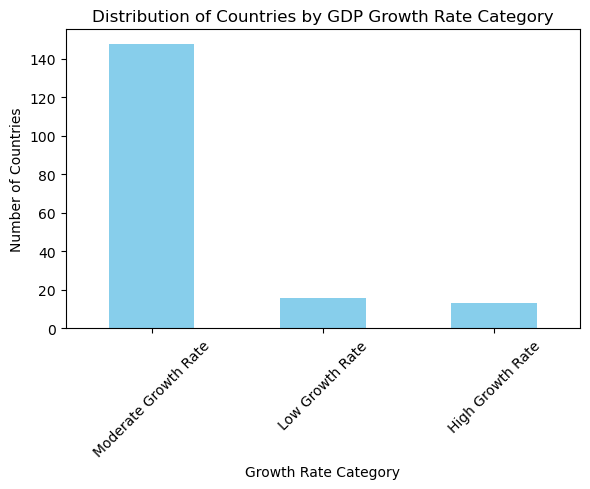

In [79]:
#visualize these results
categories=df['Growth Rate Category'].unique()
# Count the number of countries in each growth rate category
category_counts = df['Growth Rate Category'].value_counts()
# Plot the distribution as a bar chart
plt.figure(figsize=(6, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Countries by GDP Growth Rate Category')
plt.xlabel('Growth Rate Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most countries(148) grew by single digit figures whilst only 13 grew by double digits and 16 grew by figures less than 0